<a href="https://colab.research.google.com/github/yair040/AI_Course_Ramat_Gan-/blob/main/Lesson36_MNIST_Classification/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Classification
**Author:** Yair Levi  
**Platform:** Google Colab  

This notebook implements a complete neural network pipeline for classifying handwritten digits from the MNIST database.

## 1. MNIST Database - Load and Visualize

The MNIST database contains:
- 60,000 training images
- 10,000 testing images
- Each image is 28×28 pixels in grayscale
- 10 classes (digits 0-9)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


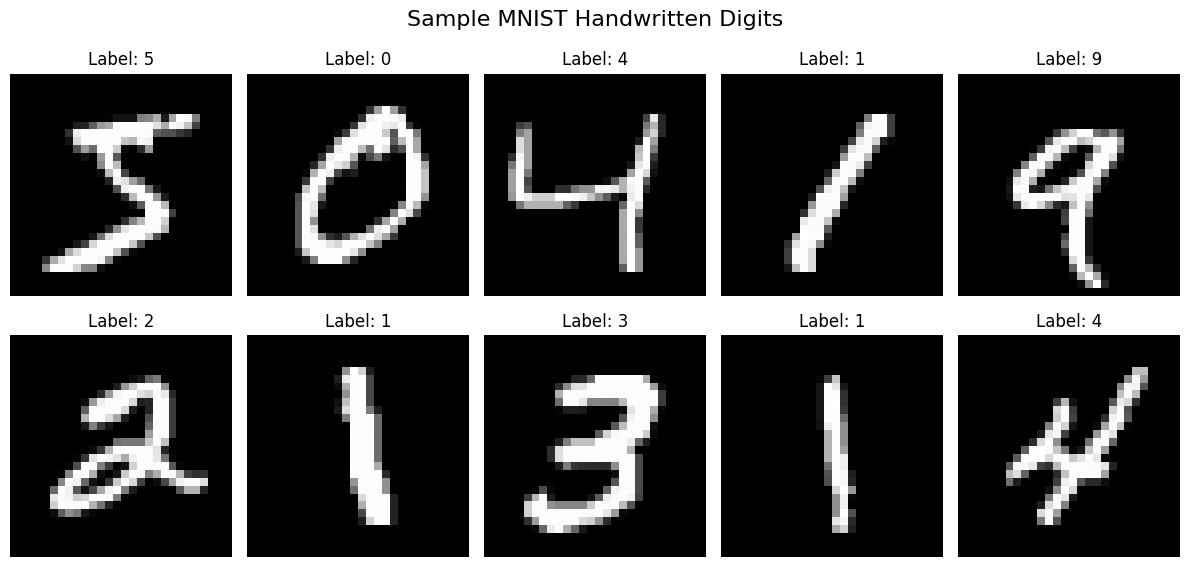


Pixel value range: 0 to 255
Image dimensions: 28 x 28 pixels


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
# X_train: 60,000 images of 28x28 pixels (training data)
# y_train: 60,000 labels (0-9) for training
# X_test: 10,000 images of 28x28 pixels (test data)
# y_test: 10,000 labels (0-9) for testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shapes to verify loading
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample MNIST Handwritten Digits', fontsize=16)

for i, ax in enumerate(axes.flat):
    # Display image
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Display pixel value range
print(f"\nPixel value range: {X_train.min()} to {X_train.max()}")
print(f"Image dimensions: {X_train.shape[1]} x {X_train.shape[2]} pixels")

## 2. Data Preprocessing

### 2.1 Normalization
Scale pixel values from [0, 255] to [0, 1] for better neural network performance.

In [2]:
# Normalization: Scale pixel values from [0, 255] to [0, 1]
# This improves neural network training performance
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

print(f"After normalization:")
print(f"Training data range: {X_train_normalized.min()} to {X_train_normalized.max()}")
print(f"Test data range: {X_test_normalized.min()} to {X_test_normalized.max()}")

After normalization:
Training data range: 0.0 to 1.0
Test data range: 0.0 to 1.0


### 2.2 Flattening
Convert 28×28 2D images to 784-element 1D vectors for the fully connected network.

In [11]:
# Flattening: Convert 28x28 2D images to 784-element 1D vectors
# Each pixel becomes a feature in the input vector
# Original shape: (num_samples, 28, 28)
# New shape: (num_samples, 784)

X_train_flat = X_train_normalized
X_test_flat = X_test_normalized

# Alternative using Keras Flatten layer (we'll use this in the model)
# from tensorflow.keras.layers import Flatten
# This will be applied as the first layer in our neural network

print(f"Original shape: {X_train_normalized.shape}")
print(f"Flattened shape: {X_train_flat.shape}")
print(f"Number of features per image: {X_train_flat.shape[1]}")

Original shape: (60000, 28, 28)
Flattened shape: (60000, 28, 28)
Number of features per image: 28


### 2.3 One-Hot Encoding
Convert integer labels to binary vectors for multi-class classification.

In [12]:
# One-Hot Encoding: Convert integer labels to binary vectors
# Label 0 → [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Label 1 → [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# Label 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

print(f"Original label shape: {y_train.shape}")
print(f"One-hot encoded label shape: {y_train_onehot.shape}")
print(f"\nExample - Original label: {y_train[0]}")
print(f"One-hot encoded: {y_train_onehot[0]}")

# Note: We can also use sparse_categorical_crossentropy loss
# which works with integer labels directly (y_train instead of y_train_onehot)

Original label shape: (60000,)
One-hot encoded label shape: (60000, 10)

Example - Original label: 5
One-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 3. Neural Network Architecture

Build a fully connected (dense) network:
- Input: 784 neurons (28×28 pixels)
- Hidden layers: Configurable (default: 2 layers with 128, 64 neurons)
- Output: 10 neurons (one per digit class)
- Activation: ReLU for hidden layers, Softmax for output
- Loss: Categorical Cross-Entropy

In [13]:
# Build Fully Connected Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# User-configurable parameters
# You can modify these to experiment with different architectures
num_hidden_layers = 2
neurons_per_layer = [128, 64]  # Number of neurons in each hidden layer
input_shape = (28, 28)  # Image dimensions
num_classes = 10  # Number of digit classes (0-9)

# Create Sequential model
model = Sequential()

# Input Layer: Flatten 28x28 images to 784-element vectors
model.add(Flatten(input_shape=input_shape, name='input_flatten'))

# Hidden Layers with ReLU activation
# ReLU(x) = max(0, x) - introduces non-linearity
for i, neurons in enumerate(neurons_per_layer):
    model.add(Dense(
        units=neurons,
        activation='relu',
        name=f'hidden_layer_{i+1}'
    ))
    print(f"Added hidden layer {i+1} with {neurons} neurons")

# Output Layer: 10 neurons with Softmax activation
# Softmax converts raw scores to probabilities that sum to 1
model.add(Dense(
    units=num_classes,
    activation='softmax',
    name='output_layer'
))

# Display model architecture
print("\n" + "="*60)
print("NEURAL NETWORK ARCHITECTURE")
print("="*60)
model.summary()

# Explanation of layers:
print("\n" + "="*60)
print("Layer Explanation:")
print("="*60)
print("1. Flatten Layer: Converts 28x28 image to 784-element vector")
for i, neurons in enumerate(neurons_per_layer):
    print(f"{i+2}. Dense Layer {i+1}: {neurons} neurons with ReLU activation")
print(f"{len(neurons_per_layer)+2}. Output Layer: 10 neurons with Softmax activation")
print("\nTotal trainable parameters: weights + biases for all connections")

Added hidden layer 1 with 128 neurons
Added hidden layer 2 with 64 neurons

NEURAL NETWORK ARCHITECTURE


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_flatten (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Layer Explanation:
1. Flatten Layer: Converts 28x28 image to 784-element vector
2. Dense Layer 1: 128 neurons with ReLU activation
3. Dense Layer 2: 64 neurons with ReLU activation
4. Output Layer: 10 neurons with Softmax activation

Total trainable parameters: weights + biases for all connections


### 3.1 Compile the Model
Configure the optimizer, loss function, and metrics.

In [14]:
# Compile the model
# This configures the learning process

model.compile(
    # Optimizer: Adam with configurable learning rate
    # Adam adapts the learning rate during training
    optimizer=keras.optimizers.Adam(learning_rate=0.001),

    # Loss Function: Categorical Cross-Entropy
    # Measures how different predicted probabilities are from true labels
    # Formula: -sum(y_true * log(y_pred))
    loss='categorical_crossentropy',

    # Metrics: Track accuracy during training
    metrics=['accuracy']
)

print("Model compiled successfully!")
print(f"Optimizer: Adam (learning_rate=0.001)")
print(f"Loss Function: Categorical Cross-Entropy")
print(f"Metrics: Accuracy")

Model compiled successfully!
Optimizer: Adam (learning_rate=0.001)
Loss Function: Categorical Cross-Entropy
Metrics: Accuracy


## 4. Data Splitting

MNIST comes pre-split. We can use the original split or create a custom 85/15 split.

In [15]:
# Data Splitting: 85% Training / 15% Test

# APPROACH 1: Use original MNIST split (recommended)
# Original: 60,000 train (85.7%), 10,000 test (14.3%)
print("Approach 1: Using original MNIST split")
print(f"Training samples: {X_train_flat.shape[0]} ({X_train_flat.shape[0]/(X_train_flat.shape[0]+X_test_flat.shape[0])*100:.1f}%)")
print(f"Test samples: {X_test_flat.shape[0]} ({X_test_flat.shape[0]/(X_train_flat.shape[0]+X_test_flat.shape[0])*100:.1f}%)")

# APPROACH 2: Custom 85/15 split (if exact ratio required)
from sklearn.model_selection import train_test_split

# Combine all data
X_all = np.concatenate([X_train_flat, X_test_flat], axis=0)
y_all = np.concatenate([y_train_onehot, y_test_onehot], axis=0)

# Split into 85% train, 15% test
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(
    X_all, y_all,
    test_size=0.15,
    random_state=42,
    stratify=np.argmax(y_all, axis=1)  # Ensure balanced classes
)

print(f"\nApproach 2: Custom 85/15 split")
print(f"Training samples: {X_train_custom.shape[0]} ({X_train_custom.shape[0]/(X_train_custom.shape[0]+X_test_custom.shape[0])*100:.1f}%)")
print(f"Test samples: {X_test_custom.shape[0]} ({X_test_custom.shape[0]/(X_train_custom.shape[0]+X_test_custom.shape[0])*100:.1f}%)")

# We'll use the original split for our training
X_train_final = X_train_flat
y_train_final = y_train_onehot
X_test_final = X_test_flat
y_test_final = y_test_onehot

Approach 1: Using original MNIST split
Training samples: 60000 (85.7%)
Test samples: 10000 (14.3%)

Approach 2: Custom 85/15 split
Training samples: 59500 (85.0%)
Test samples: 10500 (15.0%)


## 5. Training (Fit)

Train the model using backpropagation with Adam optimizer and gradient descent.

In [16]:
# Training Configuration
epochs = 10  # Number of complete passes through the training data
batch_size = 128  # Number of samples per gradient update
validation_split = 0.1  # Use 10% of training data for validation

print("="*60)
print("TRAINING CONFIGURATION")
print("="*60)
print(f"Epochs: {epochs}")
print(f"Batch Size: {batch_size}")
print(f"Validation Split: {validation_split*100}%")
print(f"Learning Rate: 0.001 (Adam optimizer)")
print(f"Optimization Method: Adam (Adaptive Moment Estimation)")
print(f"Backpropagation: Automatic via TensorFlow/Keras")
print("="*60)

# Train the model
# The fit() method performs the entire training loop:
# - Forward propagation
# - Loss calculation (Cross-Entropy)
# - Backward propagation (automatic differentiation)
# - Weight updates (Adam optimizer with learning rate)

history = model.fit(
    X_train_final,  # Training data (normalized, flattened)
    y_train_final,  # Training labels (one-hot encoded)
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,  # Validation during training
    verbose=1  # Display progress
)

print("\nTraining completed!")

TRAINING CONFIGURATION
Epochs: 10
Batch Size: 128
Validation Split: 10.0%
Learning Rate: 0.001 (Adam optimizer)
Optimization Method: Adam (Adaptive Moment Estimation)
Backpropagation: Automatic via TensorFlow/Keras
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8112 - loss: 0.6665 - val_accuracy: 0.9578 - val_loss: 0.1444
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9533 - loss: 0.1580 - val_accuracy: 0.9665 - val_loss: 0.1096
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9687 - loss: 0.1057 - val_accuracy: 0.9743 - val_loss: 0.0869
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9774 - loss: 0.0750 - val_accuracy: 0.9772 - val_loss: 0.0777
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9838 - loss: 0.0557 - val_accuracy: 0.9753 - val_loss: 0.0785
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9874 - loss: 0.0439 - val_accuracy: 0.9772 - val_loss: 0.0790
Epoch 7/10
422/42

### 5.1 Visualize Training Progress

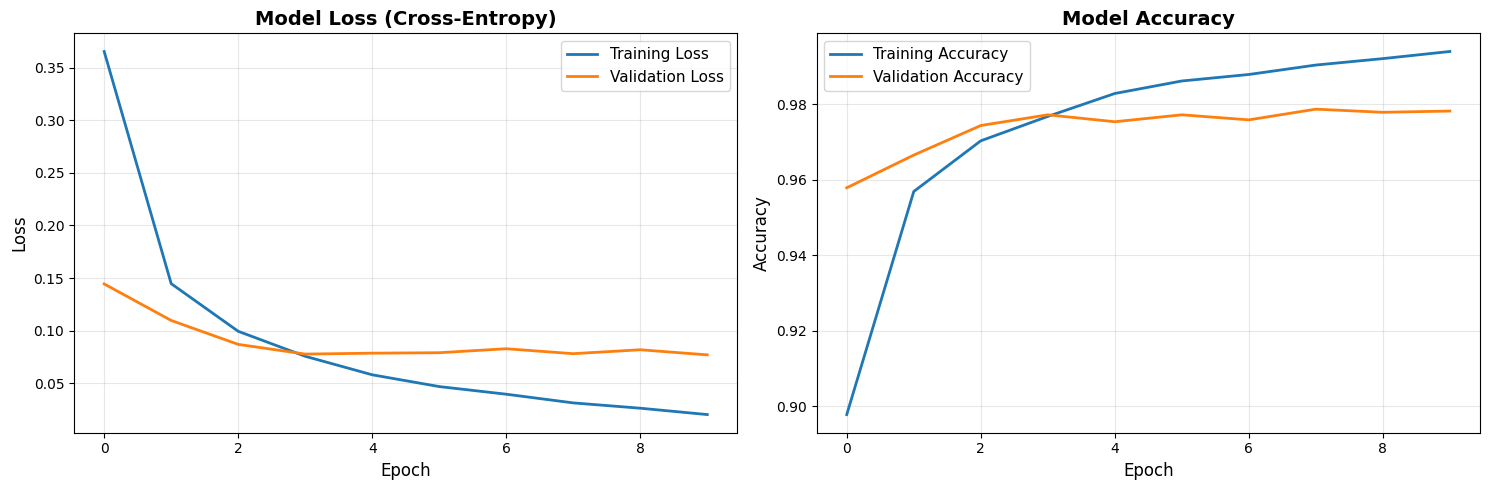


TRAINING RESULTS
Final Training Loss: 0.0201
Final Training Accuracy: 99.39%
Final Validation Loss: 0.0769
Final Validation Accuracy: 97.82%


In [17]:
# Visualize Training History
# Plot Loss and Accuracy over epochs

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Cross-Entropy Loss
ax1.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax1.set_title('Model Loss (Cross-Entropy)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax2.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final training metrics
print("\n" + "="*60)
print("TRAINING RESULTS")
print("="*60)
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
print("="*60)

## 6. Testing and Evaluation

### 6.1 Visualize Sample Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


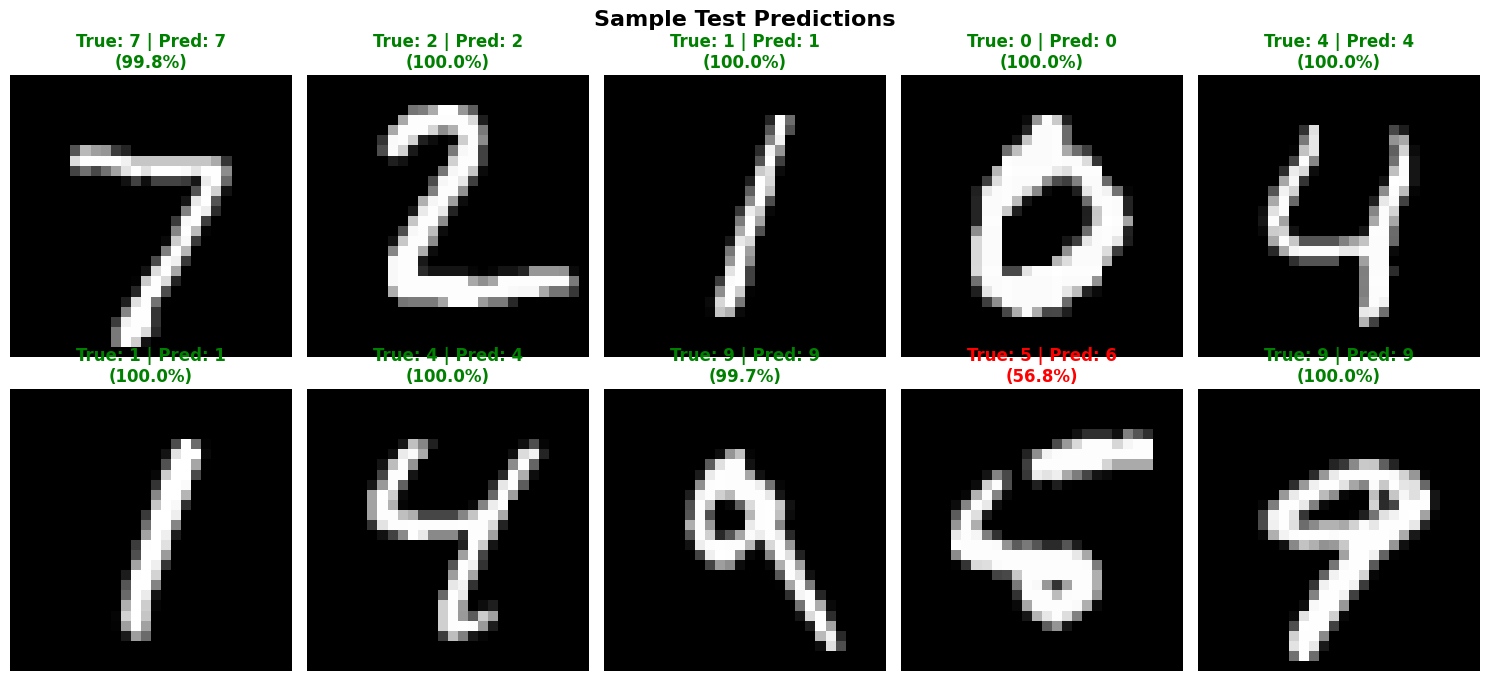

In [18]:
# Test on Sample Images
# Predict on first 10 test images and visualize results

# Get predictions (probabilities for each class)
sample_predictions = model.predict(X_test_final[:10])

# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
fig.suptitle('Sample Test Predictions', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    # Get predicted class and probability
    predicted_class = np.argmax(sample_predictions[i])
    true_class = np.argmax(y_test_final[i])
    confidence = sample_predictions[i][predicted_class] * 100

    # Display image
    ax.imshow(X_test_normalized[i], cmap='gray')

    # Color code: green if correct, red if incorrect
    color = 'green' if predicted_class == true_class else 'red'
    ax.set_title(f'True: {true_class} | Pred: {predicted_class}\n({confidence:.1f}%)',
                 color=color, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

### 6.2 Full Test Set Evaluation

In [19]:
# Evaluate on Full Test Set
test_loss, test_accuracy = model.evaluate(X_test_final, y_test_final, verbose=0)

print("="*60)
print("TEST SET EVALUATION")
print("="*60)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Total Test Samples: {X_test_final.shape[0]}")
print(f"Correctly Classified: {int(test_accuracy * X_test_final.shape[0])}")
print(f"Misclassified: {int((1-test_accuracy) * X_test_final.shape[0])}")
print("="*60)

TEST SET EVALUATION
Test Loss: 0.0764
Test Accuracy: 97.93%
Total Test Samples: 10000
Correctly Classified: 9793
Misclassified: 206


### 6.3 Confusion Matrix (10×10)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


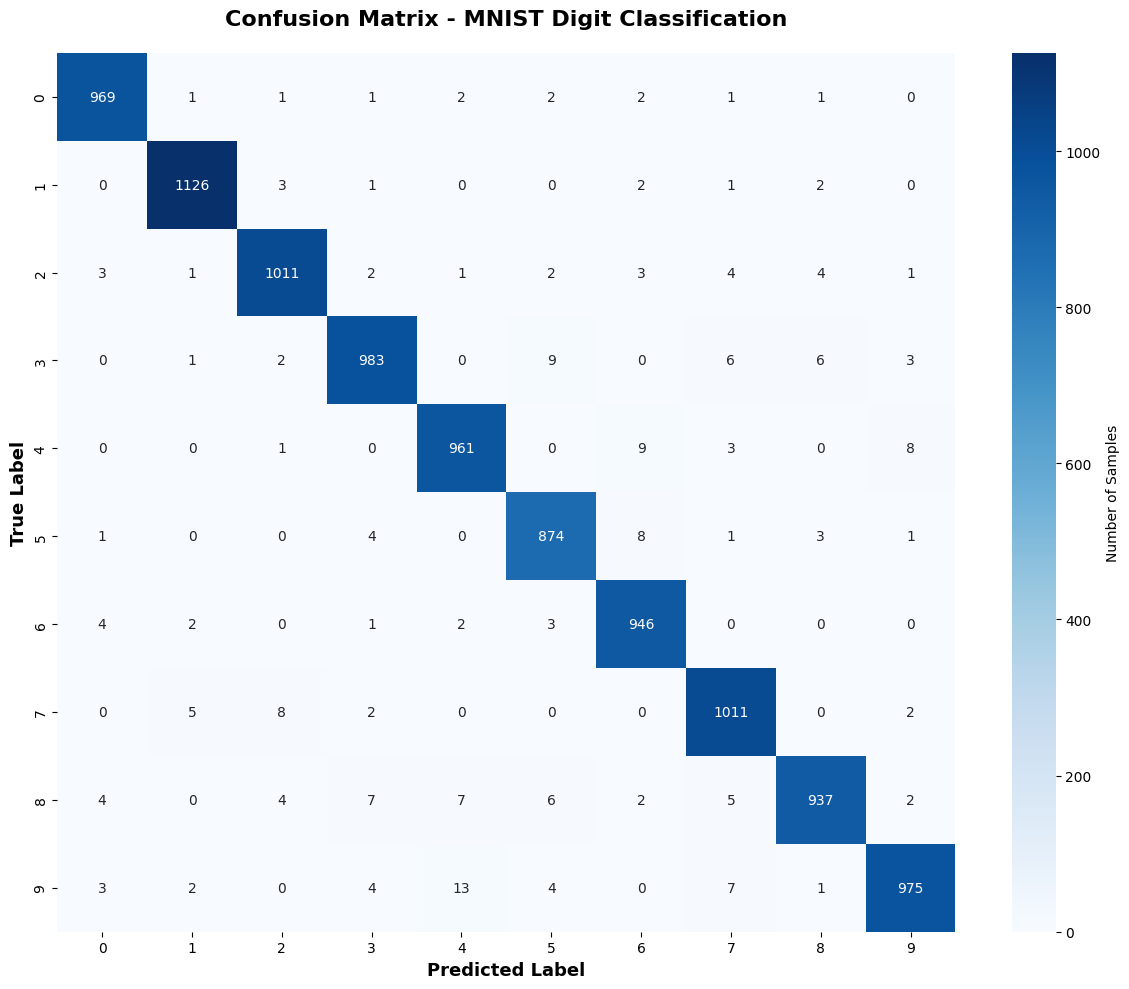


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


PER-CLASS ACCURACY
Digit 0: 98.88% (969/980 correct)
Digit 1: 99.21% (1126/1135 correct)
Digit 2: 97.97% (1011/1032 correct)
Digit 3: 97.33% (983/1010 correct)
Digit 4: 97.86% (961/982 correct)
Digit 5: 97.98% (874/89

In [20]:
# Generate Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions for entire test set
y_pred_probs = model.predict(X_test_final)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_final, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix - MNIST Digit Classification', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Print detailed classification report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))

# Analyze per-class accuracy
print("\n" + "="*60)
print("PER-CLASS ACCURACY")
print("="*60)
for digit in range(10):
    digit_accuracy = cm[digit, digit] / cm[digit, :].sum() * 100
    print(f"Digit {digit}: {digit_accuracy:.2f}% ({cm[digit, digit]}/{cm[digit, :].sum()} correct)")
print("="*60)

### 6.4 Analyze Misclassifications

Total misclassified samples: 207


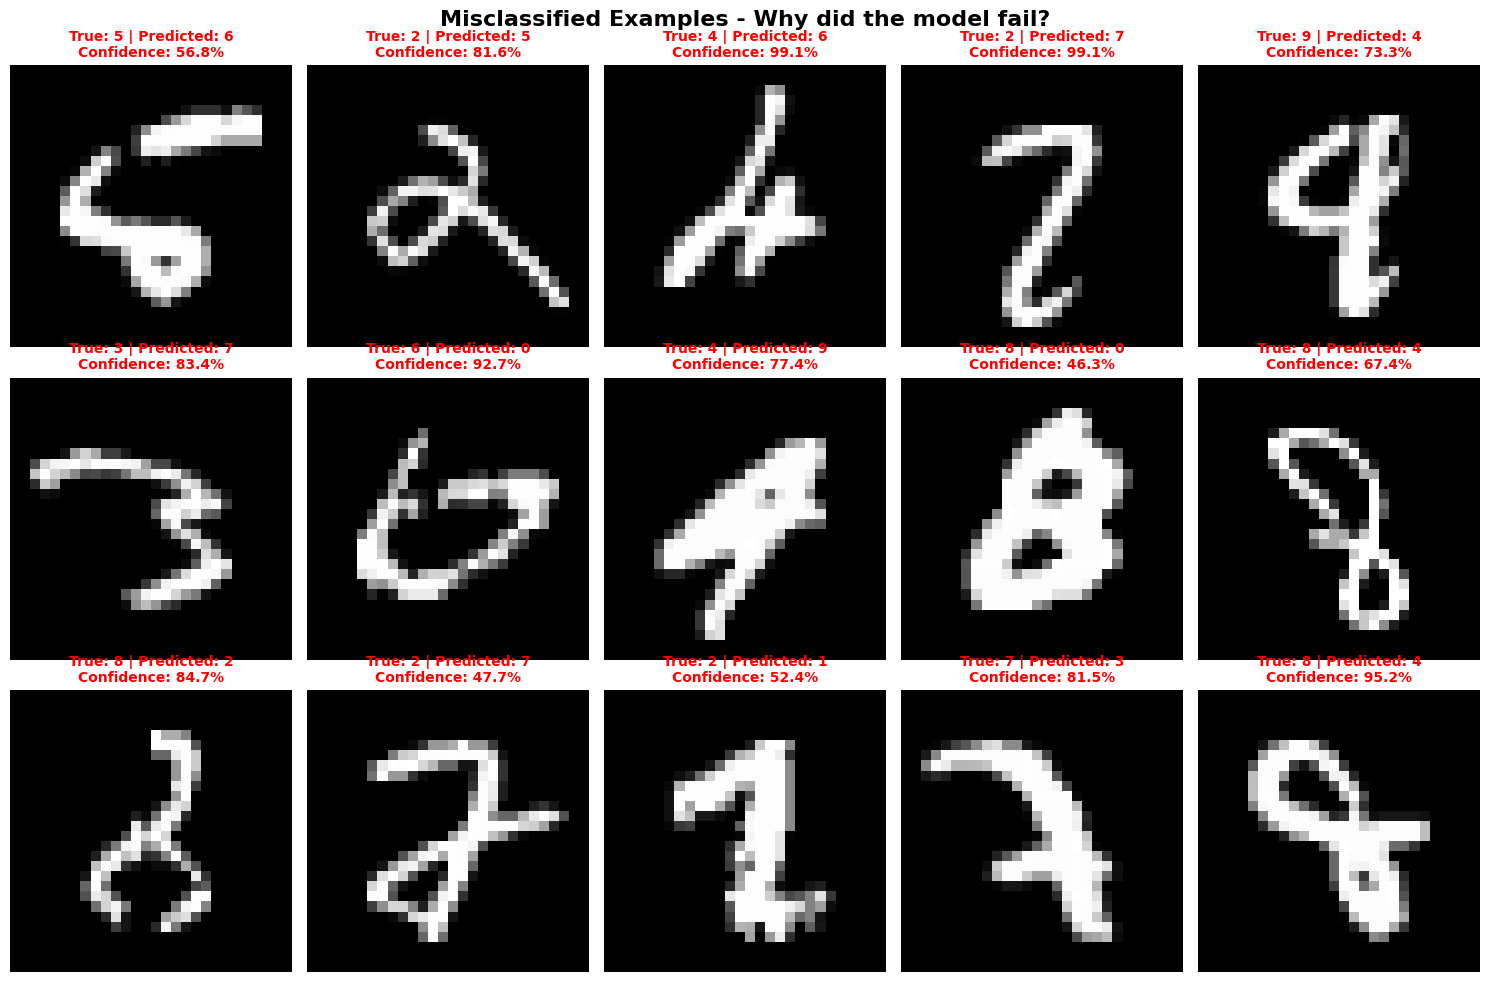


MOST COMMON CONFUSIONS
True → Predicted (Count)
----------------------------------------
  9 → 4: 13 times
  3 → 5: 9 times
  4 → 6: 9 times
  4 → 9: 8 times
  5 → 6: 8 times
  7 → 2: 8 times
  8 → 3: 7 times
  8 → 4: 7 times
  9 → 7: 7 times
  3 → 7: 6 times

Possible reasons for misclassification:
- Ambiguous or unclear handwriting
- Similar digit shapes (e.g., 4↔9, 3↔8, 5↔6)
- Unusual writing styles not well-represented in training data
- Low contrast or partial digits


In [21]:
# Analyze Misclassified Examples
# Find samples where model prediction was incorrect

# Get indices of misclassified samples
misclassified_idx = np.where(y_pred != y_true)[0]
print(f"Total misclassified samples: {len(misclassified_idx)}")

# Show first 15 misclassified samples
num_show = min(15, len(misclassified_idx))
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
fig.suptitle('Misclassified Examples - Why did the model fail?',
             fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    if i < num_show:
        idx = misclassified_idx[i]

        # Get prediction details
        true_label = y_true[idx]
        pred_label = y_pred[idx]
        confidence = y_pred_probs[idx][pred_label] * 100

        # Display image
        ax.imshow(X_test_normalized[idx], cmap='gray')
        ax.set_title(f'True: {true_label} | Predicted: {pred_label}\n'
                    f'Confidence: {confidence:.1f}%',
                    color='red', fontweight='bold', fontsize=10)
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

# Analyze most common confusions
print("\n" + "="*60)
print("MOST COMMON CONFUSIONS")
print("="*60)

# Find pairs of digits most frequently confused
confusion_pairs = []
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 0:
            confusion_pairs.append((i, j, cm[i, j]))

# Sort by frequency
confusion_pairs.sort(key=lambda x: x[2], reverse=True)

print("True → Predicted (Count)")
print("-" * 40)
for true_digit, pred_digit, count in confusion_pairs[:10]:
    print(f"  {true_digit} → {pred_digit}: {count} times")

print("\nPossible reasons for misclassification:")
print("- Ambiguous or unclear handwriting")
print("- Similar digit shapes (e.g., 4↔9, 3↔8, 5↔6)")
print("- Unusual writing styles not well-represented in training data")
print("- Low contrast or partial digits")
print("="*60)

## 7. Model Improvement (Manual Experimentation)

Try different architectures and hyperparameters to improve performance.

### 7.1 Experiment 1: Deeper Network

In [22]:
# EXPERIMENT 1: Deeper Network with More Neurons
print("\n" + "="*60)
print("EXPERIMENT 1: Deeper Network")
print("="*60)

model_v2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu', name='hidden_1'),  # Increased from 128
    Dense(128, activation='relu', name='hidden_2'),  # Same as before
    Dense(64, activation='relu', name='hidden_3'),   # Additional layer
    Dense(10, activation='softmax', name='output')
])

model_v2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training model with deeper architecture...")
history_v2 = model_v2.fit(
    X_train_final, y_train_final,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluate
test_loss_v2, test_accuracy_v2 = model_v2.evaluate(X_test_final, y_test_final, verbose=0)
print(f"\nExperiment 1 Results:")
print(f"Test Accuracy: {test_accuracy_v2*100:.2f}%")
print(f"Improvement: {(test_accuracy_v2 - test_accuracy)*100:+.2f}%")


EXPERIMENT 1: Deeper Network
Training model with deeper architecture...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8437 - loss: 0.5513 - val_accuracy: 0.9700 - val_loss: 0.1097
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9665 - loss: 0.1105 - val_accuracy: 0.9730 - val_loss: 0.0934
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9795 - loss: 0.0671 - val_accuracy: 0.9765 - val_loss: 0.0723
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9846 - loss: 0.0485 - val_accuracy: 0.9810 - val_loss: 0.0639
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9889 - loss: 0.0356 - val_accuracy: 0.9785 - val_loss: 0.0743
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9918 - loss: 0.0252 - val_accuracy: 0.9802 - val_loss: 0.0788
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9941 - loss: 0.0194 - val_accuracy: 0.9783 - val_loss: 0.0790
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0

### 7.2 Experiment 2: Add Dropout Regularization

In [23]:
# EXPERIMENT 2: Add Dropout for Regularization
from tensorflow.keras.layers import Dropout

print("\n" + "="*60)
print("EXPERIMENT 2: Add Dropout Regularization")
print("="*60)

model_v3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Randomly drop 30% of neurons during training
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_v3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training model with dropout regularization...")
history_v3 = model_v3.fit(
    X_train_final, y_train_final,
    epochs=15,  # Train longer
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluate
test_loss_v3, test_accuracy_v3 = model_v3.evaluate(X_test_final, y_test_final, verbose=0)
print(f"\nExperiment 2 Results:")
print(f"Test Accuracy: {test_accuracy_v3*100:.2f}%")
print(f"Improvement: {(test_accuracy_v3 - test_accuracy)*100:+.2f}%")


EXPERIMENT 2: Add Dropout Regularization
Training model with dropout regularization...
Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7226 - loss: 0.8521 - val_accuracy: 0.9612 - val_loss: 0.1280
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9374 - loss: 0.2169 - val_accuracy: 0.9738 - val_loss: 0.0905
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9553 - loss: 0.1517 - val_accuracy: 0.9765 - val_loss: 0.0781
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9650 - loss: 0.1182 - val_accuracy: 0.9795 - val_loss: 0.0696
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9689 - loss: 0.1041 - val_accuracy: 0.9798 - val_loss: 0.0719
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9737 - loss: 0.0900 - val_accuracy: 0.9817 - val_loss: 0.0651
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9769 - loss: 0.0777 - val_accuracy: 0.9808 - val_loss: 0.0686
Epoch 8/15
42

### 7.3 Experiment 3: Adjust Learning Rate

In [24]:
# EXPERIMENT 3: Adjust Learning Rate
print("\n" + "="*60)
print("EXPERIMENT 3: Lower Learning Rate")
print("="*60)

model_v4 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_v4.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training model with lower learning rate...")
history_v4 = model_v4.fit(
    X_train_final, y_train_final,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluate
test_loss_v4, test_accuracy_v4 = model_v4.evaluate(X_test_final, y_test_final, verbose=0)
print(f"\nExperiment 3 Results:")
print(f"Test Accuracy: {test_accuracy_v4*100:.2f}%")
print(f"Improvement: {(test_accuracy_v4 - test_accuracy)*100:+.2f}%")


EXPERIMENT 3: Lower Learning Rate
Training model with lower learning rate...
Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7179 - loss: 0.8973 - val_accuracy: 0.9543 - val_loss: 0.1595
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9309 - loss: 0.2398 - val_accuracy: 0.9662 - val_loss: 0.1122
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9485 - loss: 0.1732 - val_accuracy: 0.9732 - val_loss: 0.0924
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9589 - loss: 0.1402 - val_accuracy: 0.9765 - val_loss: 0.0804
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9654 - loss: 0.1195 - val_accuracy: 0.9773 - val_loss: 0.0743
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9703 - loss: 0.0983 - val_accuracy: 0.9780 - val_loss: 0.0713
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9733 - loss: 0.0843 - val_accuracy: 0.9787 - val_loss: 0.0676
Epoch 8/15
422/422 ━━━━

### 7.4 Compare All Models

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


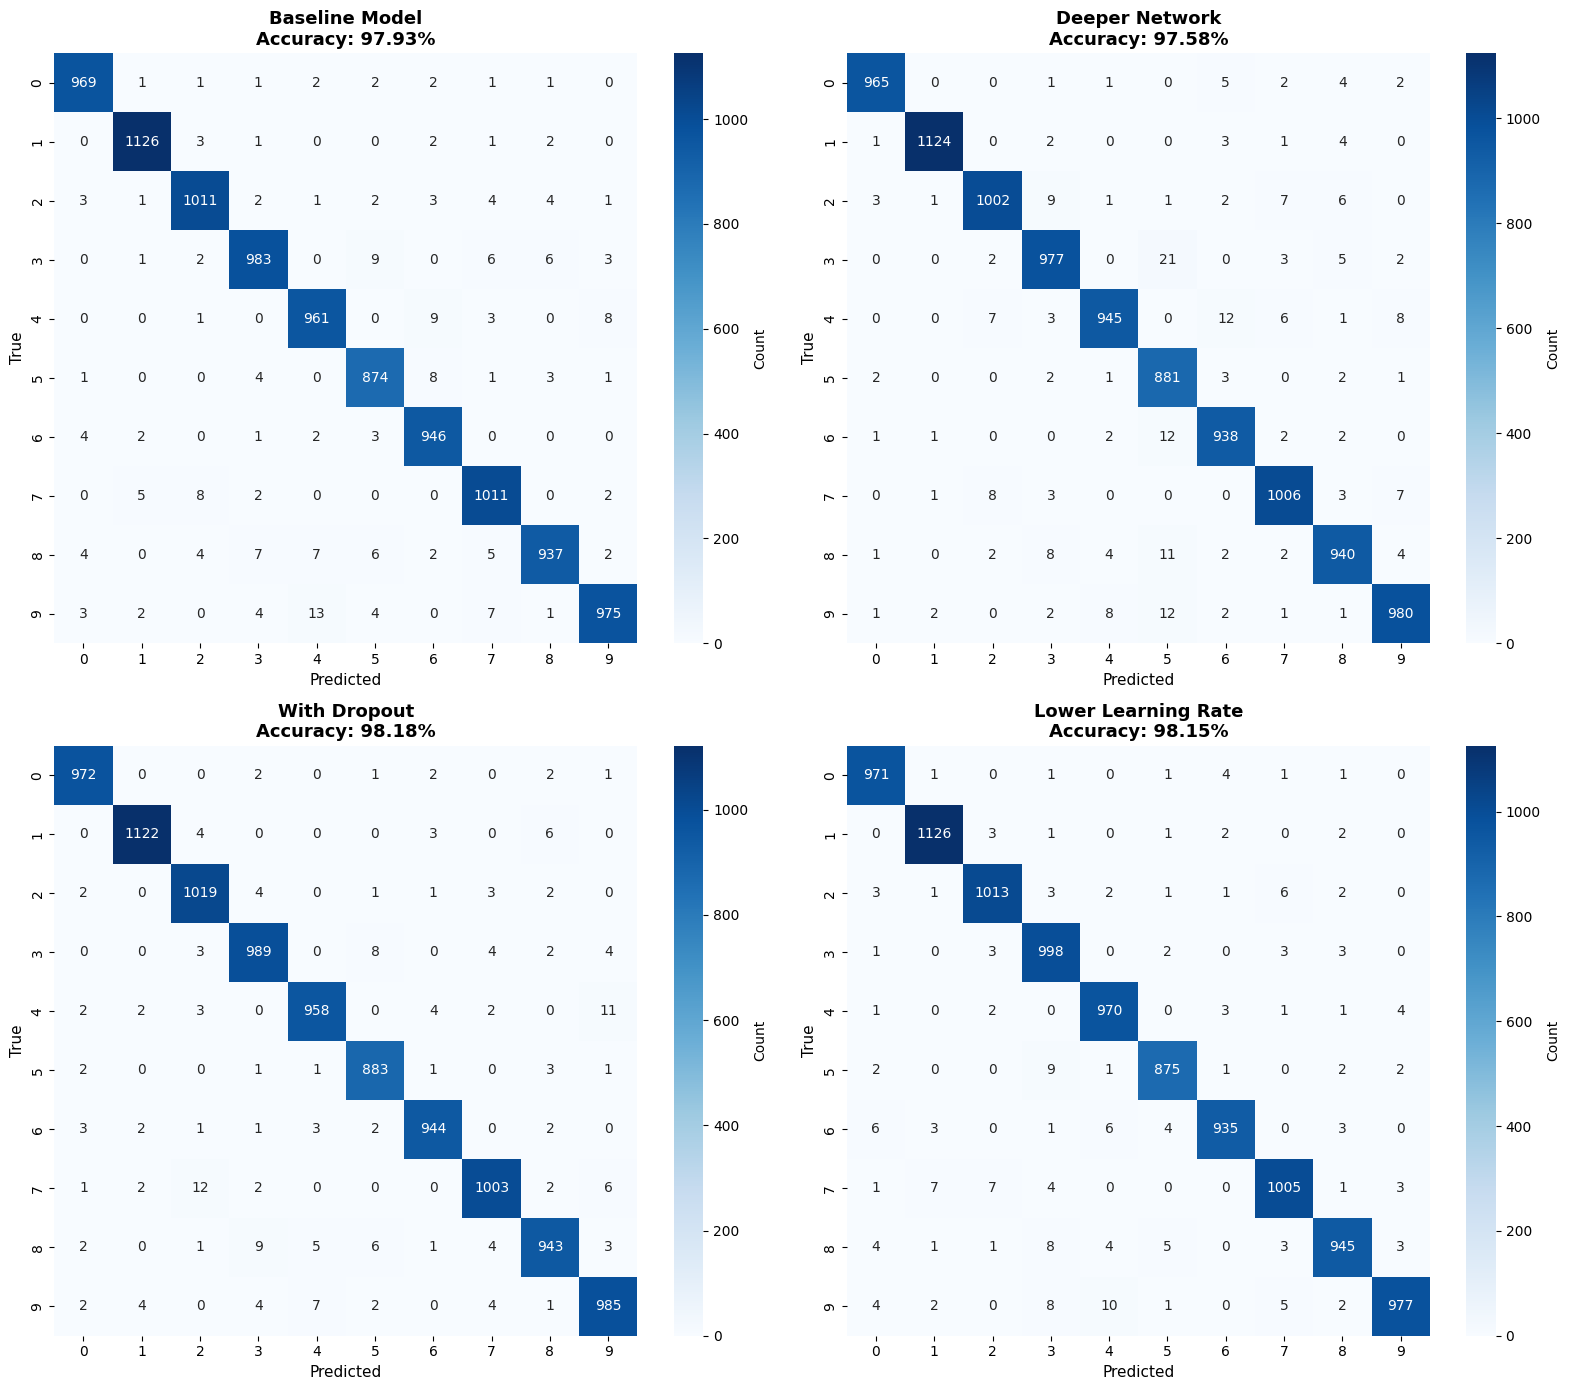


MODEL COMPARISON SUMMARY
Model                     Accuracy        Improvement
------------------------------------------------------------
Baseline Model             97.93%         +0.00%
Deeper Network             97.58%         -0.35%
With Dropout               98.18%         +0.25%
Lower Learning Rate        98.15%         +0.22%

FACTORS CONTRIBUTING TO IMPROVEMENT:
------------------------------------------------------------
1. Deeper Network (more layers, more neurons):
   - Increases model capacity to learn complex patterns
   - More parameters allow better feature representation

2. Dropout Regularization:
   - Prevents overfitting by randomly dropping neurons
   - Forces network to learn robust features
   - Improves generalization to unseen data

3. Learning Rate Adjustment:
   - Lower learning rate = smaller weight updates
   - Allows more precise convergence to optimal weights
   - May require more epochs but often achieves better accuracy

4. Training Duration (more epoc

In [25]:
# Compare All Models with Confusion Matrices
models_comparison = [
    ("Baseline Model", model, test_accuracy),
    ("Deeper Network", model_v2, test_accuracy_v2),
    ("With Dropout", model_v3, test_accuracy_v3),
    ("Lower Learning Rate", model_v4, test_accuracy_v4)
]

# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, (name, mdl, acc) in enumerate(models_comparison):
    # Generate predictions
    y_pred_temp = np.argmax(mdl.predict(X_test_final), axis=1)
    cm_temp = confusion_matrix(y_true, y_pred_temp)

    # Plot
    sns.heatmap(cm_temp, annot=True, fmt='d', cmap='Blues',
                ax=axes[idx], xticklabels=range(10), yticklabels=range(10),
                cbar_kws={'label': 'Count'})
    axes[idx].set_title(f'{name}\nAccuracy: {acc*100:.2f}%',
                       fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=11)
    axes[idx].set_ylabel('True', fontsize=11)

plt.tight_layout()
plt.show()

# Summary comparison
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(f"{'Model':<25} {'Accuracy':<15} {'Improvement'}")
print("-" * 60)
for name, mdl, acc in models_comparison:
    improvement = (acc - test_accuracy) * 100
    print(f"{name:<25} {acc*100:>6.2f}%        {improvement:>+6.2f}%")
print("="*60)

# Explain improvements
print("\nFACTORS CONTRIBUTING TO IMPROVEMENT:")
print("-" * 60)
print("1. Deeper Network (more layers, more neurons):")
print("   - Increases model capacity to learn complex patterns")
print("   - More parameters allow better feature representation")
print()
print("2. Dropout Regularization:")
print("   - Prevents overfitting by randomly dropping neurons")
print("   - Forces network to learn robust features")
print("   - Improves generalization to unseen data")
print()
print("3. Learning Rate Adjustment:")
print("   - Lower learning rate = smaller weight updates")
print("   - Allows more precise convergence to optimal weights")
print("   - May require more epochs but often achieves better accuracy")
print()
print("4. Training Duration (more epochs):")
print("   - More iterations allow better convergence")
print("   - Network has more time to learn patterns")
print("   - Watch for overfitting if trained too long")
print("="*60)

## Conclusion

This notebook demonstrates a complete MNIST digit classification pipeline:

1. ✅ Loaded and visualized MNIST dataset
2. ✅ Preprocessed with normalization, flattening, and one-hot encoding
3. ✅ Built configurable fully connected neural network
4. ✅ Trained using backpropagation with Adam optimizer
5. ✅ Evaluated with confusion matrix and error analysis
6. ✅ Experimented with improvements (deeper networks, dropout, learning rate)

**Expected Results:**
- Baseline accuracy: 97-98%
- With improvements: 98-99%

**Further Improvements:**
- Convolutional Neural Networks (CNNs)
- Data augmentation
- Batch normalization
- Ensemble methods

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
